In [2]:
class Node:
  def __init__(self, value):
    self.value = value
    self.edges = []
    self.visited = False
    self.parent = None

  def add_edge(self, other):
    self.edges.append(other)
    # other.edges.add(self)

  def reset(self):
    self.visited = False
    self.parent = None

  def __repr__(self):
    return str(self.value)

In [3]:
class Graph:
  def __init__(self):
    self.graph = {}

  def add_node(self, node):
    if not isinstance(node, Node):
      node = Node(node)
    value = node.value
    # if not value in self.graph:
    self.graph[value] = node
    return node

  def get_node(self, node):
    return self.graph.get(node, None)

  def __repr__(self):
    pass

  def reset(self):
    for node in self.graph:
      self.get_node(node).reset()

In [9]:
from graphviz import Digraph, Graph


def trace(root, graph):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()

  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in graph[v]:
        if not (v, child) in edges:
          edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges


def draw_dot(root, graph, is_directed=False):
  if is_directed:
    dot = Digraph(format="svg", engine="sfdp")
  else:
    dot = Graph(format="svg", engine="sfdp")
  nodes, edges = trace(root, graph)
  for n in nodes:
    dot.node(n)
  for n1, n2 in edges:
    dot.edge(n1, n2)
  return dot

In [10]:
smol_graph = {
  "A": ["B", "D"],
  "B": ["C"],
  "C": ["D", "E"],
  "D": ["E"],
  "E": [],
}

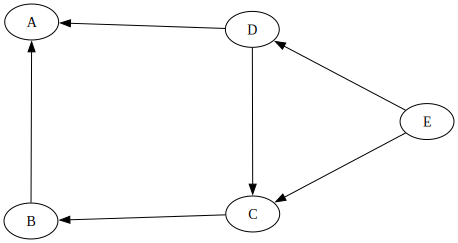

In [11]:
draw_dot("A", smol_graph, True)

In [7]:
topo = []
visited = set()


def build_topo(v):
  if not v in visited:
    visited.add(v)
    for child in smol_graph[v]:
      build_topo(child)
    topo.append(v)


build_topo("A")

In [8]:
topo

['E', 'D', 'C', 'B', 'A']